<a href="https://colab.research.google.com/github/manyasahay/Computer-Vision/blob/main/SIFT_desc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import cv2
import matplotlib.pyplot as plt

In [16]:
img = cv2.imread('/content/eiffel.PNG')

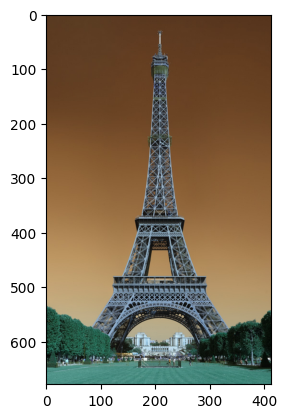

In [17]:
plt.imshow(img)

In [18]:
sift = cv2.SIFT_create()
kp,des = sift.detectAndCompute(img,None)
print(des)

[[  0.   0.   0. ...  12.   7.   2.]
 [  3.   2.   0. ...  43.  10.   8.]
 [ 13.  32.  47. ...   0.   0.   0.]
 ...
 [ 12.   2.   2. ...   0.   0.   0.]
 [ 11.  17.   7. ...   0.   0.   2.]
 [159. 159.   1. ...   0.   0.   0.]]


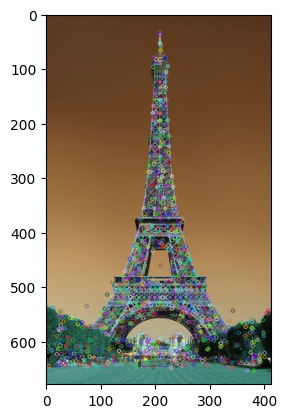

In [26]:
image_with_keypoints = cv2.drawKeypoints(img, kp, None)

plt.imshow(image_with_keypoints)

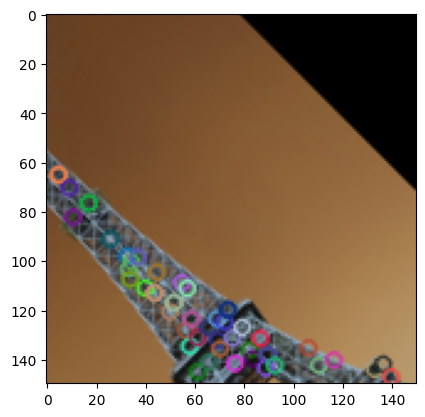

In [27]:
# Scale the image
scaled_image = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

# Rotate the image
(h, w) = scaled_image.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv2.warpAffine(scaled_image, rotation_matrix, (w, h))

# Crop the image
cropped_image = rotated_image[50:200, 50:200]
keypoints_mod, descriptors_mod = sift.detectAndCompute(cropped_image, None)
image_with_keypoints_mod = cv2.drawKeypoints(cropped_image, keypoints_mod, None)
plt.imshow(image_with_keypoints_mod)

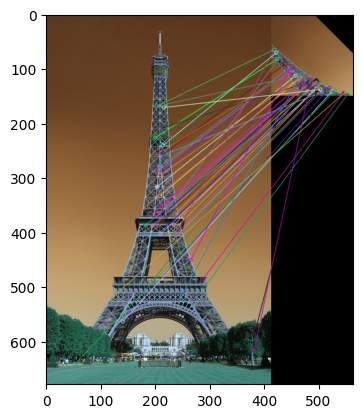

In [28]:
# Initialize the Brute Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des, descriptors_mod)

# Sort matches based on distance (best match first)
matches = sorted(matches, key=lambda x: x.distance)

# Draw the top 50 matches
matched_image = cv2.drawMatches(img, kp, cropped_image, keypoints_mod, matches[:50], None, flags=2)
plt.imshow(matched_image)